### 전처리 목적이 바뀌어 사용 안하는 cell _(실행 시키면 안됩니다. 접어두시면 됩니다.)_

In [2]:
stylecolor1 = pd.get_dummies(df, columns=['Style 1', 'Color 1'], dtype=int)

# 더미 값들이 많아서 열이 너무 많이 생기는 문제 발생
pd.options.display.max_columns = None   # columns를 모두 display 해줘라!

stylecolor1.head(3)

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 2,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID,Style 1_Active,Style 1_Cool,Style 1_Cute,Style 1_Elegant,Style 1_Gorgeous,Style 1_Simple,Color 1_Beige,Color 1_Black,Color 1_Blue,Color 1_Brown,Color 1_Colorful,Color 1_Gray,Color 1_Green,Color 1_Light blue,Color 1_Orange,Color 1_Pink,Color 1_Purple,Color 1_Red,Color 1_White,Color 1_Yellow
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,aye aye,Steep Hill,Cool,Blue,dirt-clod wall,tatami,717;1849;7047;2736;787;5970;3449;3622;3802;410...,brd06,B3RyfNEqwGmcccRC3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,sidekick,Go K.K. Rider,Simple,Black,concrete wall,colorful tile flooring,7845;7150;3468;4080;290;3971;3449;1708;4756;25...,squ05,SGMdki6dzpDZyXAw5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Agnes,Pig,Female,Big Sister,Play,21-Apr,snuffle,K.K. House,Elegant,White,gray molded-panel wall,arabesque flooring,4129;7236;7235;7802;896;3428;4027;7325;3958;71...,pig17,jzWCiDPm9MqtCfecP,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [3]:
# one-hot encoding을 진행해줬던 열들의 이름이 '(one-hot encode 당한 열의 이름)_(해당 열의 속성값)'으로 구성되어있음
# 가독성을 위해, '(해당 열의 속성값)'만 남겨두고 언더바부터 앞의 문자까지 삭제해주는 전처리 진행

# 미리 지정해둔 함수를 통해 전처리
from dfrename import *

check = rename_columns(stylecolor1)
check.head(3)

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 2,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID,Active,Cool,Cute,Elegant,Gorgeous,Simple,Beige,Black,Blue,Brown,Colorful,Gray,Green,Light blue,Orange,Pink,Purple,Red,White,Yellow
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,aye aye,Steep Hill,Cool,Blue,dirt-clod wall,tatami,717;1849;7047;2736;787;5970;3449;3622;3802;410...,brd06,B3RyfNEqwGmcccRC3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,sidekick,Go K.K. Rider,Simple,Black,concrete wall,colorful tile flooring,7845;7150;3468;4080;290;3971;3449;1708;4756;25...,squ05,SGMdki6dzpDZyXAw5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Agnes,Pig,Female,Big Sister,Play,21-Apr,snuffle,K.K. House,Elegant,White,gray molded-panel wall,arabesque flooring,4129;7236;7235;7802;896;3428;4027;7325;3958;71...,pig17,jzWCiDPm9MqtCfecP,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [5]:
# 'Style 2' and 'Color 2' values 기반으로 columns 값 업데이트
style_columns = ['Active', 'Cool', 'Cute', 'Elegant', 'Gorgeous', 'Simple']
color_columns = ['Beige', 'Black', 'Blue', 'Brown', 'Colorful', 'Gray', 'Green', 'Light blue', 'Orange',
                 'Pink', 'Purple', 'Red', 'White', 'Yellow']

# 각 행을 돌면서 그 값에 맞는 열에 맞게 값 업데이트
for index, row in check.iterrows():
    # Update for Style 2
    style_value = row['Style 2']
    if style_value in style_columns:
        check.at[index, style_value] += 1
    
    # Update for Color 2
    color_value = row['Color 2']
    if color_value in color_columns:
        check.at[index, color_value] += 1

check.head()

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 2,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID,Active,Cool,Cute,Elegant,Gorgeous,Simple,Beige,Black,Blue,Brown,Colorful,Gray,Green,Light blue,Orange,Pink,Purple,Red,White,Yellow
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,aye aye,Steep Hill,Cool,Blue,dirt-clod wall,tatami,717;1849;7047;2736;787;5970;3449;3622;3802;410...,brd06,B3RyfNEqwGmcccRC3,0,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,sidekick,Go K.K. Rider,Simple,Black,concrete wall,colorful tile flooring,7845;7150;3468;4080;290;3971;3449;1708;4756;25...,squ05,SGMdki6dzpDZyXAw5,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,Agnes,Pig,Female,Big Sister,Play,21-Apr,snuffle,K.K. House,Elegant,White,gray molded-panel wall,arabesque flooring,4129;7236;7235;7802;896;3428;4027;7325;3958;71...,pig17,jzWCiDPm9MqtCfecP,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,Al,Gorilla,Male,Lazy,Fitness,18-Oct,ayyyeee,Go K.K. Rider,Active,White,concrete wall,green rubber flooring,1452;4078;4013;833;4116;3697;7845;3307;3946;39...,gor08,LBifxETQJGEaLhBjC,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,Alfonso,Alligator,Male,Lazy,Play,9-Jun,it'sa me,Forest Life,Simple,Blue,yellow playroom wall,green honeycomb tile,4763;3205;3701;1557;3623;85;3208;3584;4761;121...,crd00,REpd8KxB8p9aGBRSE,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [8]:
encoded = pd.get_dummies(AP_df, columns=['Gender', 'Personality', 'Hobby'], dtype=int)
check = rename_columns(encoded)
check.head(3)

,Name,Species,Active,Cool,Cute,Elegant,Gorgeous,Simple,Beige,Black,Blue,Brown,Colorful,Gray,Green,Light blue,Orange,Pink,Purple,Red,White,Yellow,AP,Female,Male,Big Sister,Cranky,Jock,Lazy,Normal,Peppy,Smug,Snooty,Education,Fashion,Fitness,Music,Nature,Play
0,Admiral,Bird,0,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0.2101,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,Agent S,Squirrel,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0.1548,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,Agnes,Pig,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.1961,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [20]:
# Conversation Type One-Hot Encoding

from dfrename import rename_columns

encoded = pd.get_dummies(social_points, columns=['Conversation Type'], dtype=int)
encoded = rename_columns(encoded)
encoded.head(3)

,Name,Sociability,A,B
0,Admiral,2,1,0
1,Agent S,3,0,1
2,Agnes,3,1,0


In [11]:
crawled = pd.read_csv('../prep_data_files/crawled_kor_name.csv')
crawled.head(2)

,Name,Korean Name
0,Admiral,일섭
1,Agent S,2호


In [15]:
# 이전 버전
# final.to_csv('../prep_data_files/beready_villagers.csv', index=False)
# 인기 순위는 crawling 가능하면 crawling 하고, 안되면 수기로 작성
# 일단 korean name까지 크롤링 한 거 합해서 데이터로 만들기!

In [27]:
# data.to_csv("../prep_data_files/ACNH_dataframe.csv", index=False, encoding='utf-8')

### 전처리 시작

In [57]:
# 라이브러리 불러오기
import pandas as pd

df = pd.read_csv("../kaggle-dataset/villagers.csv")
df.head()

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,aye aye,Steep Hill,Cool,Cool,Black,Blue,dirt-clod wall,tatami,717;1849;7047;2736;787;5970;3449;3622;3802;410...,brd06,B3RyfNEqwGmcccRC3
1,Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,sidekick,Go K.K. Rider,Active,Simple,Blue,Black,concrete wall,colorful tile flooring,7845;7150;3468;4080;290;3971;3449;1708;4756;25...,squ05,SGMdki6dzpDZyXAw5
2,Agnes,Pig,Female,Big Sister,Play,21-Apr,snuffle,K.K. House,Simple,Elegant,Pink,White,gray molded-panel wall,arabesque flooring,4129;7236;7235;7802;896;3428;4027;7325;3958;71...,pig17,jzWCiDPm9MqtCfecP
3,Al,Gorilla,Male,Lazy,Fitness,18-Oct,ayyyeee,Go K.K. Rider,Active,Active,Red,White,concrete wall,green rubber flooring,1452;4078;4013;833;4116;3697;7845;3307;3946;39...,gor08,LBifxETQJGEaLhBjC
4,Alfonso,Alligator,Male,Lazy,Play,9-Jun,it'sa me,Forest Life,Simple,Simple,Red,Blue,yellow playroom wall,green honeycomb tile,4763;3205;3701;1557;3623;85;3208;3584;4761;121...,crd00,REpd8KxB8p9aGBRSE


#### 불러온 kaggle 데이터 프레임부터 전처리

* Color 칼럼의 경우, 동물 주민에게 쓰인 색채는 매우 다양한데 두 개밖에 적히지 않아 색을 대표할 수 없으리라 판단해 삭제했다.
* 또한, Catchphrase는 의성어로, 모두가 다 다른 값을 가지고 있어 어떤 의미가 없다고 판단해 삭제했다.
* Favorite Song은 각 노래마다 일의 자리수 퍼센트정도 차지하고 있어 삭제했다.
* Unique Entry ID와 Furniture List는 의미없는 숫자의 나열이었기 때문에 삭제해주었다.
* Birthday의 경우, Kaggle Data Description 기준 1930년대부터 2029년까지로 되어 있어서 삭제했다.

In [58]:
df = df.drop(['Color 1', 'Color 2', 'Favorite Song', 'Birthday', 'Catchphrase', 'Furniture List', 'Unique Entry ID', 'Flooring', 'Filename', 'Wallpaper'], axis=1)
df.head()

,Name,Species,Gender,Personality,Hobby,Style 1,Style 2
0,Admiral,Bird,Male,Cranky,Nature,Cool,Cool
1,Agent S,Squirrel,Female,Peppy,Fitness,Active,Simple
2,Agnes,Pig,Female,Big Sister,Play,Simple,Elegant
3,Al,Gorilla,Male,Lazy,Fitness,Active,Active
4,Alfonso,Alligator,Male,Lazy,Play,Simple,Simple


#### Appear Possibility (AP) Feature

* 마일 섬 _(마을에 빈 집이 생겼을 때, 마을에 없는 주민을 데려갈 수 있는 섬)_ 에서 그 주민을 만날 수 있는 확률 (%)
* equation = 1/(주민 동물종의 수) * 1/(원하는 그 동물종의 동숲에 현존하는 수) - (본인 마을에 다 모은 그 종의 수)
    * 하지만, 다 모은 종의 수를 알 수 없기 때문에 저 다 모은 종의 수는 0으로 두자.
    * 해당 전처리를 할 수 있는 코드는 prep/mapping.py에 making_appear_possibility라는 함수로 정의해 두었다.

In [59]:
from mapping import making_appear_possibility

AP_df, species_names, df_species_count = making_appear_possibility(df)
AP_df.head(3)

,Name,Species,Gender,Personality,Hobby,Style 1,Style 2,AP
0,Admiral,Bird,Male,Cranky,Nature,Cool,Cool,0.2101
1,Agent S,Squirrel,Female,Peppy,Fitness,Active,Simple,0.1548
2,Agnes,Pig,Female,Big Sister,Play,Simple,Elegant,0.1961


In [60]:
AP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         391 non-null    object 
 1   Species      391 non-null    object 
 2   Gender       391 non-null    object 
 3   Personality  391 non-null    object 
 4   Hobby        391 non-null    object 
 5   Style 1      391 non-null    object 
 6   Style 2      391 non-null    object 
 7   AP           391 non-null    float64
dtypes: float64(1), object(7)
memory usage: 24.6+ KB


#### X 값으로 쓸 변수들의 데이터프레임으로 잘라줌

In [61]:
X_cols =  AP_df.iloc[:, 1:]
X_cols.head(3)

,Species,Gender,Personality,Hobby,Style 1,Style 2,AP
0,Bird,Male,Cranky,Nature,Cool,Cool,0.2101
1,Squirrel,Female,Peppy,Fitness,Active,Simple,0.1548
2,Pig,Female,Big Sister,Play,Simple,Elegant,0.1961


In [62]:
X_cols.insert(0, 'AP', X_cols.pop('AP'))
X_cols.head(3)

,AP,Species,Gender,Personality,Hobby,Style 1,Style 2
0,0.2101,Bird,Male,Cranky,Nature,Cool,Cool
1,0.1548,Squirrel,Female,Peppy,Fitness,Active,Simple
2,0.1961,Pig,Female,Big Sister,Play,Simple,Elegant


#### 수풀림 동물의 숲 백과사전 사이트에서 crawling한 데이터
* 주민의 대화타입 및 사회성을 가져옴

In [63]:
# 대화타입 및 사회성 crawled 파일 갖고 오기

conver_social = pd.read_csv('../prep_data_files/crawled_conver_greet.csv')
conver_social.head(3)

,Name,Sociability,Conversation Type
0,Admiral,['Middel'],['A']
1,Agent S,['↑'],['B']
2,Agnes,['↑'],['A']


#### crawling한 데이터 정제

* 정규화 사용

In [64]:
print(conver_social['Conversation Type'].unique())
print(conver_social['Sociability'].unique())

["['A']" "['B']"]
["['Middel']" "['↑']" "['↓']"]


In [65]:
# [, ', ] 제거
conver_social['Conversation Type'] = conver_social['Conversation Type'].replace({'[\[\]\']': ''}, regex=True)   # 정규화로 제거
conver_social['Sociability'] = conver_social['Sociability'].replace({'[\[\]\']': ''}, regex=True)

conver_social.head(3)

,Name,Sociability,Conversation Type
0,Admiral,Middel,A
1,Agent S,↑,B
2,Agnes,↑,A


In [66]:
# Sociability 전처리
# 'Middel', '↑', '↓' 가 존재
# mapping 시켜 1점, 2

from mapping import mapping_social

social_points = mapping_social(conver_social, 'Sociability')
social_points.head(3)

,Name,Sociability,Conversation Type
0,Admiral,2,A
1,Agent S,3,B
2,Agnes,3,A


In [67]:
del social_points['Name']
social_points.head(3)

,Sociability,Conversation Type
0,2,A
1,3,B
2,3,A


#### 수풀잎 백과사전 순위
* Rank column; 수기로 작성

In [68]:
names_w_rank = pd.read_csv('../prep_data_files/beready_villagers.csv')   # 수풀잎 백과사전 순위
names_w_rank.head(3)

,Name,Korean Name,Rank,Active,Cool,Cute,Elegant,Gorgeous,Simple,Beige,...,Normal,Peppy,Smug,Snooty,Education,Fashion,Fitness,Music,Nature,Play
0,Admiral,일섭,201,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Agent S,2호,151,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
2,Agnes,아그네스,181,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [69]:
names_w_rank = names_w_rank.iloc[:, :3]
names_w_rank.head(2)

,Name,Korean Name,Rank
0,Admiral,일섭,201
1,Agent S,2호,151


#### 지금까지 불러온 데이터 프레임 1차적으로 concat

In [70]:
data = pd.concat([names_w_rank, X_cols, social_points], axis=1)
data.head(3)

,Name,Korean Name,Rank,AP,Species,Gender,Personality,Hobby,Style 1,Style 2,Sociability,Conversation Type
0,Admiral,일섭,201,0.2101,Bird,Male,Cranky,Nature,Cool,Cool,2,A
1,Agent S,2호,151,0.1548,Squirrel,Female,Peppy,Fitness,Active,Simple,3,B
2,Agnes,아그네스,181,0.1961,Pig,Female,Big Sister,Play,Simple,Elegant,3,A


In [71]:
# 미첼 (Rank 1) 데이터 직접 넣기
# 요근래 가장 인기 많은 캐릭터라, 안 넣기가 좀 그래서 넣어보았다.

data.loc[391] = ['Sasha', '미첼', 1, 0.1337, 'Rabbit', 'Male', 'Lazy', 'Fashion', 'Simple', 'Simple', 2, 'B']
data.tail(3)

,Name,Korean Name,Rank,AP,Species,Gender,Personality,Hobby,Style 1,Style 2,Sociability,Conversation Type
389,Zell,넬슨,130,0.2451,Deer,Male,Smug,Music,Cool,Gorgeous,2,A
390,Zucker,탁호,66,0.9804,Octopus,Male,Lazy,Nature,Simple,Cute,2,A
391,Sasha,미첼,1,0.1337,Rabbit,Male,Lazy,Fashion,Simple,Simple,2,B


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 391
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               392 non-null    object 
 1   Korean Name        392 non-null    object 
 2   Rank               392 non-null    int64  
 3   AP                 392 non-null    float64
 4   Species            392 non-null    object 
 5   Gender             392 non-null    object 
 6   Personality        392 non-null    object 
 7   Hobby              392 non-null    object 
 8   Style 1            392 non-null    object 
 9   Style 2            392 non-null    object 
 10  Sociability        392 non-null    int64  
 11  Conversation Type  392 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 39.8+ KB


#### 이상형 월드컵 PiKu 사이트 데이터
* 순위와 승률 사용
    * 우승 비율: 최종 우승 / 이 게임이 실행된 총 횟수
    * 승률: n강전 때마다 해당 캐릭터가 우승한 횟수 / 해당 캐릭터가 n강전을 진행한 횟수

In [73]:
new_rank = pd.read_excel("../prep_data_files/이상형월드컵_0414_18시.xlsx")

new_rank.head(3)

,순위,이름,우승비율,승률
0,1,쭈니,0.1967,0.8373
1,2,애플,0.1786,0.8273
2,3,잭슨,0.1437,0.8129


In [74]:
data.head(2)

,Name,Korean Name,Rank,AP,Species,Gender,Personality,Hobby,Style 1,Style 2,Sociability,Conversation Type
0,Admiral,일섭,201,0.2101,Bird,Male,Cranky,Nature,Cool,Cool,2,A
1,Agent S,2호,151,0.1548,Squirrel,Female,Peppy,Fitness,Active,Simple,3,B


In [75]:
del new_rank['우승비율']   # 사용 안 함

In [76]:
# 1차적으로 concat한 데이터프레임과 이상형 월드컵 데이터 병합
  # Korean Name과 이름이 동일한 열, 따라서 기존에 존재하던 데이터 프레임 기준으로 join (= left join)

new_data = pd.merge(data, new_rank, left_on='Korean Name', right_on='이름', how='left')
del new_data['이름']
new_data

,Name,Korean Name,Rank,AP,Species,Gender,Personality,Hobby,Style 1,Style 2,Sociability,Conversation Type,순위,승률
0,Admiral,일섭,201,0.2101,Bird,Male,Cranky,Nature,Cool,Cool,2,A,195.0,0.4138
1,Agent S,2호,151,0.1548,Squirrel,Female,Peppy,Fitness,Active,Simple,3,B,87.0,0.5954
2,Agnes,아그네스,181,0.1961,Pig,Female,Big Sister,Play,Simple,Elegant,3,A,237.0,0.2827
3,Al,우락,366,0.2941,Gorilla,Male,Lazy,Fitness,Active,Active,2,B,368.0,0.1779
4,Alfonso,알베르트,218,0.3676,Alligator,Male,Lazy,Play,Simple,Simple,2,B,174.0,0.2699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,Wolfgang,로보,42,0.2674,Wolf,Male,Cranky,Education,Cool,Active,1,B,107.0,0.5667
388,Yuka,유카리,298,0.2941,Koala,Female,Snooty,Fashion,Cool,Elegant,2,B,122.0,0.4949
389,Zell,넬슨,130,0.2451,Deer,Male,Smug,Music,Cool,Gorgeous,2,A,293.0,0.4465
390,Zucker,탁호,66,0.9804,Octopus,Male,Lazy,Nature,Simple,Cute,2,A,13.0,0.7239


In [77]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               392 non-null    object 
 1   Korean Name        392 non-null    object 
 2   Rank               392 non-null    int64  
 3   AP                 392 non-null    float64
 4   Species            392 non-null    object 
 5   Gender             392 non-null    object 
 6   Personality        392 non-null    object 
 7   Hobby              392 non-null    object 
 8   Style 1            392 non-null    object 
 9   Style 2            392 non-null    object 
 10  Sociability        392 non-null    int64  
 11  Conversation Type  392 non-null    object 
 12  순위                 387 non-null    float64
 13  승률                 387 non-null    float64
dtypes: float64(3), int64(2), object(9)
memory usage: 43.0+ KB


In [78]:
# '순위' 또는 '우승확률' 열에 결측치가 있는 행만 추출
missing_rows = new_data[(new_data['순위'].isnull()) | (new_data['승률'].isnull())]

# 결과 출력
print(missing_rows.loc[:, ['Korean Name', '순위', '승률']])

    Korean Name  순위  승률
22         쿠스케처 NaN NaN
83           츄양 NaN NaN
173         달만이 NaN NaN
189          메이 NaN NaN
391          미첼 NaN NaN


In [79]:
# '순위' 열의 결측치를 'Rank' 열의 값으로 대체
new_data['순위'] = new_data['순위'].fillna(new_data['Rank'])

In [80]:
# '순위' 또는 '우승확률' 열에 결측치가 있는 행만 추출
missing_rows = new_data[(new_data['순위'].isnull()) | (new_data['승률'].isnull())]

# 결과 출력
print(missing_rows.loc[:, ['Korean Name', '순위', '승률']])

    Korean Name     순위  승률
22         쿠스케처  346.0 NaN
83           츄양  385.0 NaN
173         달만이  218.0 NaN
189          메이   65.0 NaN
391          미첼    1.0 NaN


In [86]:
# 앞 뒤 열의 승률들을 평균내서 결측치를 채움 
new_data['승률'] = new_data['승률'].fillna(method='ffill').fillna(method='bfill')

new_data.iloc[[22, 83, 173, 189, 391]]

C:\Users\sohtk\AppData\Local\Temp\ipykernel_22880\4120789373.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_data['승률'] = new_data['승률'].fillna(method='ffill').fillna(method='bfill')


,Name,Korean Name,Rank,AP,Species,Gender,Personality,Hobby,Style 1,Style 2,Sociability,Conversation Type,순위,승률
22,Avery,쿠스케처,346,0.2941,Eagle,Male,Cranky,Music,Simple,Gorgeous,1,B,346.0,0.3449
83,Chow,츄양,385,0.1961,Bear,Male,Cranky,Fitness,Cool,Gorgeous,1,B,385.0,0.1940
173,Hopper,달만이,218,0.2101,Penguin,Male,Cranky,Music,Cool,Simple,1,B,218.0,0.5174
189,June,메이,65,0.1730,Cub,Female,Normal,Nature,Cute,Simple,2,A,65.0,0.4249
391,Sasha,미첼,1,0.1337,Rabbit,Male,Lazy,Fashion,Simple,Simple,2,B,1.0,0.7239


#### 이전 동물의 숲 시리즈에 나온 적이 있는지
- 수기로 기입
- 0이 나온 적이 없던 캐릭터고 1이 나온 적이 있던 캐릭터이다.

In [90]:
before_exist = pd.read_csv('../prep_data_files/handwriting_exist_before.csv', encoding='utf-8')
print(before_exist.shape[0])
before_exist.head(3)

392


,Name,Korean Name,Exist,Rank
0,Admiral,일섭,1,201
1,Agent S,2호,1,151
2,Agnes,아그네스,0,181


In [91]:
new_data['Exist'] = before_exist['Exist']
new_data.head(3)

,Name,Korean Name,Rank,AP,Species,Gender,Personality,Hobby,Style 1,Style 2,Sociability,Conversation Type,순위,승률,Exist
0,Admiral,일섭,201,0.2101,Bird,Male,Cranky,Nature,Cool,Cool,2,A,195.0,0.4138,1
1,Agent S,2호,151,0.1548,Squirrel,Female,Peppy,Fitness,Active,Simple,3,B,87.0,0.5954,1
2,Agnes,아그네스,181,0.1961,Pig,Female,Big Sister,Play,Simple,Elegant,3,A,237.0,0.2827,0


In [82]:
new_data.to_csv("../prep_data_files/ACNH_data_w_newrank.csv", index=False, encoding='utf-8')

----

#### 유튜브 언급량
* 키워드 6개를 maxCounts 150으로 지정하여 crawling
    * _'모동숲 주민'_, _'모동숲 주민 이사'_, _'모동숲 인기 주민 공략'_, _'모동숲'_, _'마일섬 주민'_, _'마일섬 티켓'_
    * 미리 중복되는 영상은 삭제 처리함
    * youtube가 생각보다 영상이 maxCounts를 많이 지정해도 많은 수를 반환하지 않음

In [83]:
yt_raw_total = pd.read_csv('../prep_data_files/youtube/yt_raw_total.csv', encoding='utf-8')
yt_raw_total.sort_values(by=['바이럴지표'], axis=0, ascending=False, inplace=True)
print(yt_raw_total.shape[0])
yt_raw_total.head()

181


,영상ID,제목,조회수,댓글수,좋아요수,게시일,썸네일,영상설명,바이럴지표
0,aQmPii0oqCs,[ACNH]DUMB DUMB,45126319,5672,1075908,2023-03-18T14:11:32Z,https://i.ytimg.com/vi/aQmPii0oqCs/hqdefault.jpg,#acnh #meme #isabelle,5672107590845126319
1,aSxBnPugHJ8,쭈니가 K.K. 아이돌 부르는 영상 [VR360],8193437,10368,211460,2020-04-12T15:27:57Z,https://i.ytimg.com/vi/aSxBnPugHJ8/hqdefault.jpg,모동숲 쭈니가 K.K. 아이돌 부르는 영상 [VR360]\nhttps://twitt...,103682114608193437
10,r2ko422xW0w,지능이 떨어지는 브금,3603969,5661,121783,2023-02-14T13:12:43Z,https://i.ytimg.com/vi/r2ko422xW0w/hqdefault.jpg,00:00 In Kapp'n's Bus\n03:44 3 PM\n05:11 Town ...,56611217833603969
4,4n7RoG2M4ao,나비보벳따우 1시간 연속재생 (개가수 ♪T.K. 하우스),5547755,10223,49061,2020-03-28T08:18:23Z,https://i.ytimg.com/vi/4n7RoG2M4ao/hqdefault.jpg,3년전 영상인데 이렇게 사랑해주시니 얼떨떨하네요♡\n※ 영상을 무단으로 훔쳐가는 분...,10223490615547755
17,GYMy0WkIXAA,흔한남매 빚에 쫓기고 있습니다ㅜ 모여봐요 동물의 숲 2탄!ㅋㅋㅋ(흔한남매),2417806,8501,26573,2020-04-24T06:00:08Z,https://i.ytimg.com/vi/GYMy0WkIXAA/hqdefault.jpg,우리도 섬 멋지게 꾸미고 싶다 ㅠㅜㅠㅜㅠㅜ\n다음엔 어떤 게임을 해볼까요 많은 댓글...,8501265732417806


In [85]:
yt_raw_total.to_excel('../prep_data_files/youtube/yt_raw_total.xlsx', index=False)

In [106]:
# 수기로 직접 주민과 관련된 동영상만 추려옴
yt_villager_video_raw = pd.read_csv('../prep_data_files/youtube/yt_hand_prep_aboutvillagers.csv', encoding='utf-8')
yt_villager_video_raw.head(3)

,영상ID,제목,조회수,댓글수,좋아요수,썸네일,영상설명,바이럴지표
0,aQmPii0oqCs,[ACNH]DUMB DUMB,45126319,5672,1075908,https://i.ytimg.com/vi/aQmPii0oqCs/hqdefault.jpg,#acnh #meme #isabelle,5670000000000000000.00
1,aSxBnPugHJ8,쭈니가 K.K. 아이돌 부르는 영상 [VR360],8193437,10368,211460,https://i.ytimg.com/vi/aSxBnPugHJ8/hqdefault.jpg,쭈니,104000000000000000.00
2,5-bvqy5Dxjo,동물의 숲에서 가장 귀여운 주민 누구?,3241681,2770,37482,https://i.ytimg.com/vi/5-bvqy5Dxjo/hqdefault.jpg,뽀야미,2770000000000000.00


In [107]:
# 수집해올 때, 바이럴 지표에 좋아요수 + 조회수 + 댓글수 로 만들었는데,
# 실제 유튜브 알고리즘에는 조회수와 좋아요수가 훨씬 영향을 많이 끼쳐 지우게 됨

yt_villager_video_raw['바이럴지표'] -= yt_villager_video_raw['댓글수']

In [108]:
yt_villager_video_raw['바이럴지표'].describe()

count                   142.00
mean      40886299647246632.00
std      475814974504761600.00
min                     354.00
25%            328249999672.75
50%           5679999999432.50
75%         182249999999818.50
max     5669999999999993856.00
Name: 바이럴지표, dtype: float64

In [109]:
# 과학적 표기법 대신 일반 숫자 형식으로 변경
# pd.set_option('display.float_format', '{:.2f}'.format)

In [96]:
yt_villager_video_raw['바이럴지표'].describe()

count                   142.00
mean      40886299647247272.00
std      475814974504761984.00
min                     354.00
25%            328250000000.00
50%           5680000000000.00
75%         182250000000000.00
max     5670000000000000000.00
Name: 바이럴지표, dtype: float64

<Axes: >

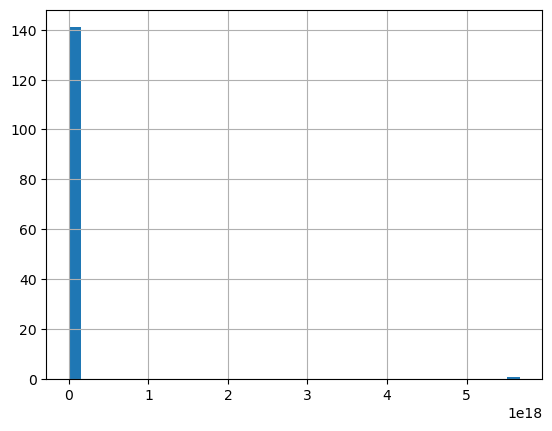

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

yt_villager_video_raw['바이럴지표'].hist(bins=36)

- 이거 너무 심각한데... 너무 지나치게 한곳에만 있어서 고르게 분포를 위해 로그 변환을 취해줌.

In [111]:
import numpy as np

# 로그 변환 적용
yt_villager_video_raw['로그_바이럴지표'] = np.log(yt_villager_video_raw['바이럴지표']/2)

<Axes: >

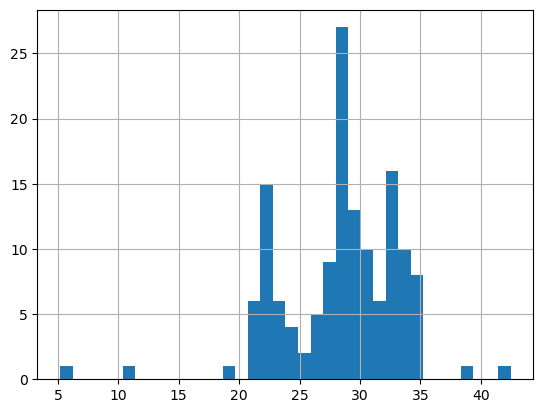

In [112]:
yt_villager_video_raw['로그_바이럴지표'].hist(bins=36)

In [113]:
yt_villager_video_raw.head(2)

,영상ID,제목,조회수,댓글수,좋아요수,썸네일,영상설명,바이럴지표,로그_바이럴지표
0,aQmPii0oqCs,[ACNH]DUMB DUMB,45126319,5672,1075908,https://i.ytimg.com/vi/aQmPii0oqCs/hqdefault.jpg,#acnh #meme #isabelle,5669999999999993856.00,42.49
1,aSxBnPugHJ8,쭈니가 K.K. 아이돌 부르는 영상 [VR360],8193437,10368,211460,https://i.ytimg.com/vi/aSxBnPugHJ8/hqdefault.jpg,쭈니,103999999999989632.00,38.49


In [114]:
yt_villager_video_raw.to_csv('../prep_data_files/youtube/yt_villagervideo_wlog.csv', index=False, encoding='utf-8')